In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import time
from sklearn.ensemble import ExtraTreesClassifier
import operator
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
def datetounix(df):
    # Initialising unixtime list
    unixtime = []

    # Running a loop for converting Date to seconds
    for date in df['DateTime']:
        unixtime.append(time.mktime(date.timetuple()))

    # Replacing Date with unixtime list
    df['DateTime'] = unixtime
    return(df)

In [3]:
df_train = pd.read_csv('/content/Train data.csv', encoding='ISO-8859-1', engine='c')
df_test = pd.read_csv('/content/Train data.csv', encoding='ISO-8859-1', engine='c')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [4]:
df_train['DateTime'] = pd.to_datetime(df_train['DateTime'], format='%d/%m/%Y %H:%M')
df_test['DateTime'] = pd.to_datetime(df_test['DateTime'], format='%d/%m/%Y %H:%M')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  48120 non-null  datetime64[ns]
 1   Junction  48120 non-null  int64         
 2   Vehicles  48120 non-null  int64         
 3   ID        48120 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.5 MB


In [5]:
# Creating features from DateTime for train data

df_test['Weekday'] = [datetime.weekday(date) for date in df_test.DateTime]
df_test['Year'] = [date.year for date in df_test.DateTime]
df_test['Month'] = [date.month for date in df_test.DateTime]
df_test['Day'] = [date.day for date in df_test.DateTime]
df_test['Time'] = [((date.hour*60+(date.minute))*60)+date.second for date in df_test.DateTime]
df_test['Week'] = [date.week for date in df_test.DateTime]
df_test['Quarter'] = [date.quarter for date in df_test.DateTime]

# Creating features from DateTime for test data

df_train['Weekday'] = [datetime.weekday(date) for date in df_train.DateTime]
df_train['Year'] = [date.year for date in df_train.DateTime]
df_train['Month'] = [date.month for date in df_train.DateTime]
df_train['Day'] = [date.day for date in df_train.DateTime]
df_train['Time'] = [((date.hour*60+(date.minute))*60)+date.second for date in df_train.DateTime]
df_train['Week'] = [date.week for date in df_train.DateTime]
df_train['Quarter'] = [date.quarter for date in df_train.DateTime]

Feature ranking:
feature 0 : DateTime (0.373231)
feature 7 : Time (0.358215)
feature 6 : Day (0.065719)
feature 3 : Weekday (0.060320)
feature 2 : ID (0.052005)
feature 1 : Junction (0.048881)
feature 8 : Week (0.030194)
feature 5 : Month (0.007574)
feature 9 : Quarter (0.002168)
feature 4 : Year (0.001692)


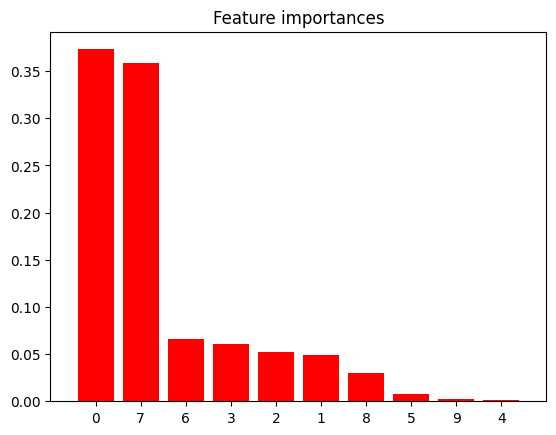

In [6]:
# create an instance for tree feature selection
tree_clf = ExtraTreesClassifier()

# first create arrays holding input and output data
# get the features into an array X
# remove target column from the df
df_train_features = df_train.drop(['Vehicles'], axis=1)

# Convet timestamp to seconds
df_train_features = datetounix(df_train_features)

# store features in X array
X = df_train_features.values

# Store target feature in y array
y = df_train['Vehicles'].values

# fit the model
tree_clf.fit(X, y)

# Preparing variables
importances = tree_clf.feature_importances_
feature_names = df_train_features.columns.tolist()

feature_imp_dict = dict(zip(feature_names, importances))
sorted_features = sorted(feature_imp_dict.items(), key=operator.itemgetter(1), reverse=True)

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("feature %d : %s (%f)" % (indices[f], sorted_features[f][0], sorted_features[f][1]))

# Plot the feature importances of the forest
plt.figure(0)
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

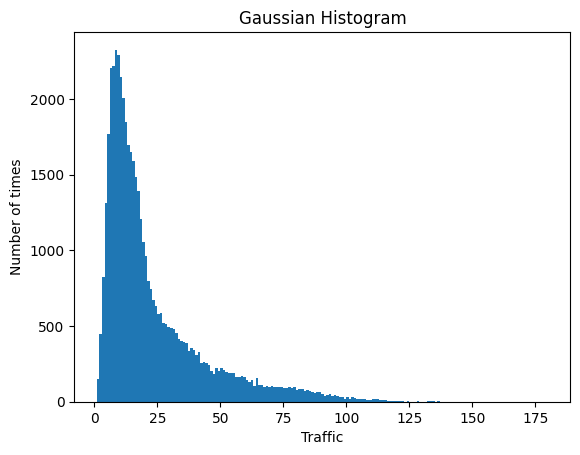

In [7]:
data = df_train.Vehicles
binwidth = 1
plt.hist(data, bins=range(min(data), max(data) + binwidth, binwidth), log=False)
plt.title("Gaussian Histogram")
plt.xlabel("Traffic")
plt.ylabel("Number of times")
plt.show()

In [8]:
# Convert timestamp to seconds
df_test_features = datetounix(df_test.drop(['Year', 'Quarter', 'Month', 'ID', 'Vehicles'], axis=1))

# Create X_test from the test set

X_test = df_test_features.values

######################################## Dropping Features from train set #######################

df_train_features = df_train.drop(['Vehicles','Year', 'Quarter', 'Month', 'ID'], axis=1)

# Convert timestamp to second

df_train_features = datetounix(df_train_features)

# store features in X array
X = df_train_features.values

# store target in y array
y = df_train['Vehicles'].values

In [9]:
# Data prep
df_solution = pd.DataFrame()
df_solution['ID'] = df_test.ID

# Starting time for time calculations
start_time = time.time()

# Create decision tree object
clf = DecisionTreeClassifier(criterion='gini', random_state = 13)

# fit the model
clf.fit(X, y)

# predict the outcome for testing data
predictions = clf.predict(X_test)

print("The time taken to execute is %s seconds" % (time.time() - start_time))

# Prepare Solution dataframe
df_solution['Vehicles'] = predictions
df_solution

The time taken to execute is 0.7784874439239502 seconds


,ID,Vehicles
0,20151101001,15
1,20151101011,13
2,20151101021,10
3,20151101031,7
4,20151101041,9
...,...,...
48115,20170630194,11
48116,20170630204,30
48117,20170630214,16
48118,20170630224,22


In [10]:
# Ensure df_pred has the same index as df_test before merging
df_pred = pd.DataFrame(df_solution)

# Merge df_test with df_pred on the 'ID' column
df_combined_test = pd.merge(df_test.drop(['DateTime', 'Weekday', 'Year', 'Month', 'Day', 'Time', 'Week', 'Quarter', 'Vehicles'], axis = 1), df_pred,
              how='inner', on = 'ID')


# Concatenate the original df_train with the merged test dataframe
frames = [df_train.drop(['DateTime', 'Weekday', 'Year', 'Month', 'Day', 'Time', 'Week', 'Quarter'], axis = 1), df_combined_test]
df = pd.concat(frames)
df

,Junction,Vehicles,ID
0,1,15,20151101001
1,1,13,20151101011
2,1,10,20151101021
3,1,7,20151101031
4,1,9,20151101041
...,...,...,...
48115,4,11,20170630194
48116,4,30,20170630204
48117,4,16,20170630214
48118,4,22,20170630224


<Axes: >

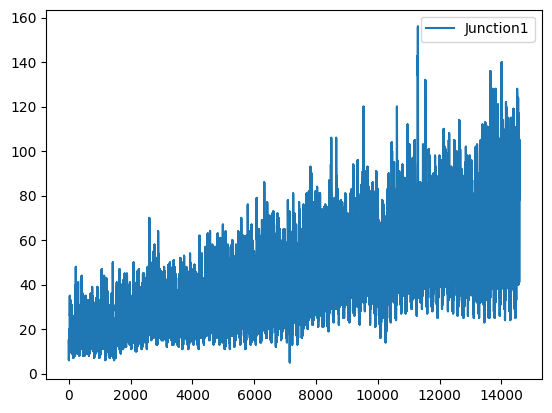

In [11]:
df[df['Junction'] == 1]['Vehicles'].plot(legend=True, label='Junction1')

<Axes: >

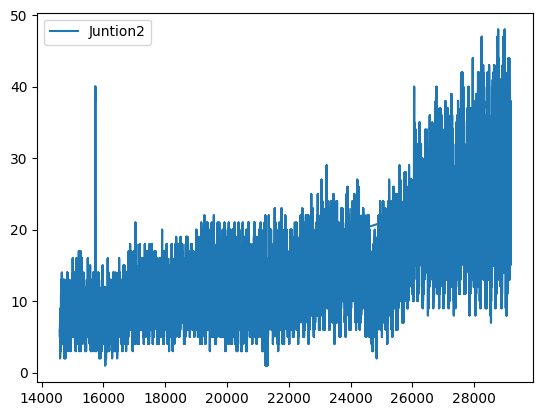

In [12]:
df[df['Junction'] == 2]['Vehicles'].plot(legend=True, label='Juntion2')

<Axes: >

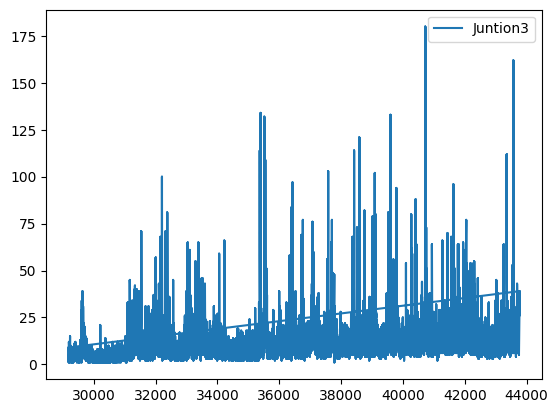

In [13]:
df[df['Junction'] == 3]['Vehicles'].plot(legend=True, label='Juntion3')

<Axes: >

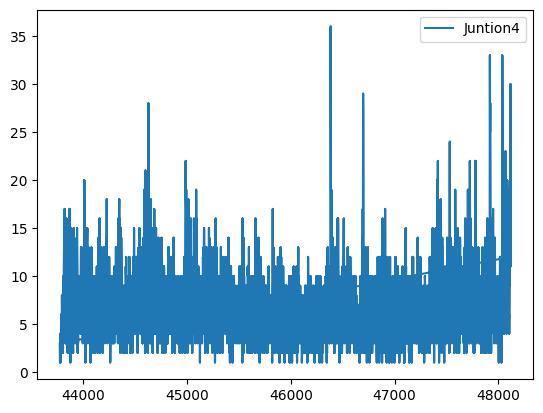

In [14]:
df[df['Junction'] == 4]['Vehicles'].plot(legend=True, label='Juntion4')

<Axes: >

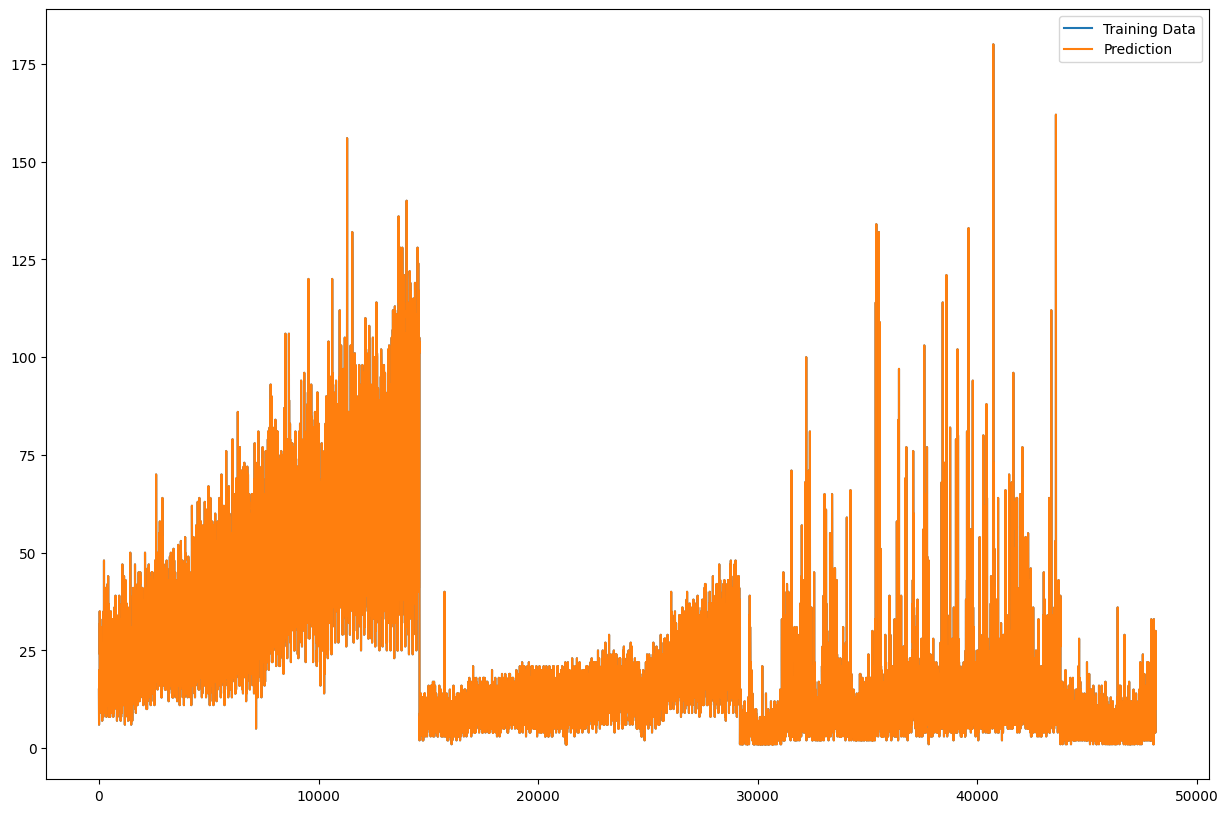

In [15]:
df_train['Vehicles'].plot(legend=True, label='Training Data', figsize=(15,10))
df_pred['Vehicles'].plot(legend=True, label='Prediction')

In [16]:
from sklearn.model_selection import train_test_split
X = df_train.drop(['Vehicles', 'DateTime'], axis = 1)
y = df_train['Vehicles']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [17]:
pred = dtree.predict(X_test)
from sklearn import metrics
metrics.mean_absolute_error(y_test, pred)
metrics.mean_squared_error(y_test, pred)
np.sqrt(metrics.mean_squared_error(y_test, pred))

np.float64(4.963827313832712)

<class 'pandas.core.series.Series'>
Index: 31 entries, 2409:40f4:100b:c1b6:b9fb:3ec3:5675:a236 to 2404:6800:4002:809::2002
Series name: count
Non-Null Count  Dtype
--------------  -----
31 non-null     int64
dtypes: int64(1)
memory usage: 496.0+ bytes
None


Text(0, 0.5, 'frequency')

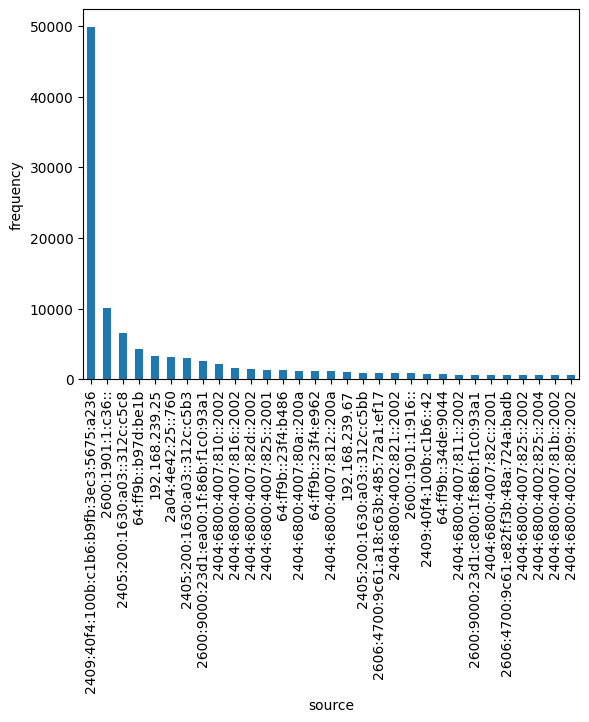

In [24]:
data=pd.read_csv('/content/late.csv',encoding='latin')
frequency=data['Source'].value_counts()
import matplotlib.pyplot as plt
for i in frequency.index:
    if frequency[i]<500:
        frequency=frequency.drop(i)
print(frequency.info())
frequency.plot(kind='bar')
plt.xlabel('source')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

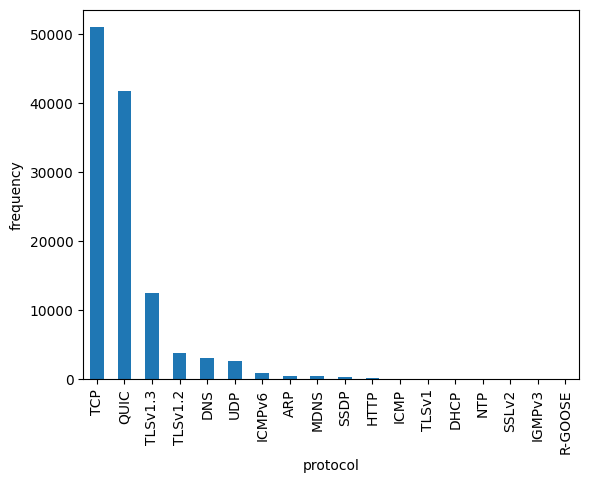

In [25]:
protocoltraffic=data['Protocol'].value_counts()
protocoltraffic.plot(kind='bar')
plt.xlabel('protocol')
plt.ylabel('frequency')